# Set up

In [0]:
!wget http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip

--2019-05-29 05:30:15--  http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip
Resolving mlg.ucd.ie (mlg.ucd.ie)... 137.43.92.206
Connecting to mlg.ucd.ie (mlg.ucd.ie)|137.43.92.206|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874078 (2.7M) [application/zip]
Saving to: ‘bbc-fulltext.zip’

bbc-fulltext.zip    100%[===================>]   2.74M   595KB/s    in 4.7s    

2019-05-29 05:30:25 (595 KB/s) - ‘bbc-fulltext.zip’ saved [2874078/2874078]



In [0]:
!mkdir news_data
!unzip -d news_data/ bbc-fulltext.zip

In [0]:
!pip install --quiet gensim

# Recommendation using word2vecs

**Recommend the news based on the headlines context**

In [0]:
from gensim.models import Word2Vec
import glob
import pandas as pd
import numpy as np

In [0]:
!rm news_data/bbc/README.TXT

In [0]:
dir_path = 'news_data/bbc/*/*'

data_paths = glob.glob(dir_path)

In [0]:
data_paths[:5]

['news_data/bbc/sport/260.txt',
 'news_data/bbc/sport/463.txt',
 'news_data/bbc/sport/143.txt',
 'news_data/bbc/sport/020.txt',
 'news_data/bbc/sport/018.txt']

In [0]:
np.random.seed(0)
np.random.shuffle(data_paths)
data_paths[:5]

['news_data/bbc/sport/013.txt',
 'news_data/bbc/politics/086.txt',
 'news_data/bbc/business/353.txt',
 'news_data/bbc/business/387.txt',
 'news_data/bbc/business/452.txt']

In [0]:
data_paths[0].split('/')[-2]

'sport'

In [0]:
headings = []

for file_path in data_paths:
  with open(file_path, 'r', encoding="latin-1") as f:
    for line in f:
      headings.append((line.strip(), file_path.split('/')[-2] ))
      break

In [0]:
len(headings)

2225

In [0]:
headings[:5]

[("Kenya lift Chepkemei's suspension", 'sport'),
 ('Howard backs stem cell research', 'politics'),
 ('Giant waves damage S Asia economy', 'business'),
 ('Germany nears 1990 jobless level', 'business'),
 ("McDonald's boss Bell dies aged 44", 'business')]

In [0]:
data = []
labels = []
for i in headings:
  heading, label = i[0], i[1]
  data.append(heading)
  labels.append(label)

data[0], labels[0]

("Kenya lift Chepkemei's suspension", 'sport')

In [0]:
data = [i.lower().split() for i in data]
data[:5], labels[:5]

([['kenya', 'lift', "chepkemei's", 'suspension'],
  ['howard', 'backs', 'stem', 'cell', 'research'],
  ['giant', 'waves', 'damage', 's', 'asia', 'economy'],
  ['germany', 'nears', '1990', 'jobless', 'level'],
  ["mcdonald's", 'boss', 'bell', 'dies', 'aged', '44']],
 ['sport', 'politics', 'business', 'business', 'business'])

In [0]:
model = Word2Vec(data, window=5, min_count=1, size=50)

In [0]:
model.train(data, total_examples=len(data), epochs=100)

(1071933, 1158000)

In [0]:
predictions = model.wv.most_similar(data[0], topn=5)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
predictions

[("den's", 0.9715946912765503),
 ('dirty', 0.9701681137084961),
 ('demise', 0.9695280194282532),
 ('emerging', 0.958913266658783),
 ('concerts', 0.9572998881340027)]

In [0]:
p = [i[0] for i in predictions]
p

["den's", 'dirty', 'demise', 'emerging', 'concerts']

In [0]:
rand_ind = np.random.randint(0, len(data))
print(data[rand_ind], labels[rand_ind])
predictions = model.wv.most_similar(data[rand_ind], topn=5)
print(predictions)
p = [i[0] for i in predictions]
print(p)

['mrs', 'howard', 'gets', 'key', 'election', 'role'] politics
[('platform', 0.8960861563682556), ('way,', 0.878477156162262), ('kilroy', 0.8762586712837219), ('cell', 0.8619588613510132), ('really', 0.8613830208778381)]
['platform', 'way,', 'kilroy', 'cell', 'really']


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
for i, v in enumerate(data):
  if len(set(v).intersection(set(p))) >= 1:
    print(v, labels[i])

['howard', 'backs', 'stem', 'cell', 'research'] politics
['why', 'cell', 'will', 'get', 'the', 'hard', 'sell'] tech
['kilroy', 'unveils', 'immigration', 'policy'] politics
['what', 'really', 'divides', 'the', 'parties'] politics
['what', 'the', 'election', 'should', 'really', 'be', 'about?'] politics
['kilroy', 'launches', "'veritas'", 'party'] politics
['kilroy', 'names', 'election', 'seat', 'target'] politics
['kilroy', 'launches', "'veritas'", 'party'] politics
['uk', 'heading', 'wrong', 'way,', 'says', 'howard'] politics
['howard', 'unveils', 'election', 'platform'] politics


In [0]:
rand_ind = np.random.randint(0, len(data))
print(data[rand_ind], labels[rand_ind])
predictions = model.wv.most_similar(data[rand_ind], topn=5)
print(predictions)
p = [i[0] for i in predictions]
print(p)

['civil', 'servants', 'in', 'strike', 'ballot'] politics
[('stalemate', 0.9500486254692078), ("'make", 0.9468778371810913), ("progress'", 0.940786600112915), ('thousands', 0.9398922324180603), ('grips', 0.9388133883476257)]
['stalemate', "'make", "progress'", 'thousands', 'grips']


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
for i, v in enumerate(data):
  if len(set(v).intersection(set(p))) >= 1:
    print(v, labels[i])

['thousands', 'join', 'strike', 'in', 'wales'] politics
['stalemate', 'in', 'pension', 'strike', 'talks'] politics
['russia', 'wto', 'talks', "'make", "progress'"] business
['train', 'strike', 'grips', 'buenos', 'aires'] business


I guess it will improve with more data

# Recommendation using nueral networks

**The idea will be to predict the category of the class and recommend the news as per the class**

## Data processing

In [0]:
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

In [0]:
em_model = model
del model

In [70]:
vectorized_data = np.array([em_model.wv[i] for i in data])

vectorized_data = pad_sequences(vectorized_data, dtype=np.float64)
vectorized_data.shape

(2225, 9, 50)

In [76]:
label_dict = dict((i, v) for i, v in enumerate(set(labels)))
rev_label_dict = dict((v, i) for i, v in zip(label_dict.keys(), label_dict.values()))

ohe_labels = to_categorical(np.array([rev_label_dict[i] for i in labels]))
ohe_labels.shape

(2225, 5)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [78]:
x_train, x_test, y_train, y_test = train_test_split(vectorized_data, ohe_labels, test_size=0.1, random_state=42)
x_train.shape, x_test.shape

((2002, 9, 50), (223, 9, 50))

## Model

In [0]:
from keras.models import Model
from keras.layers import Conv1D, Input, Dense, Input, Flatten, MaxPooling1D

In [0]:
def build_model():
  """Function to build a model."""
  
  input_shape = x_train.shape[1:]
  
  input_layer = Input(shape=input_shape, name="input_layer")
  x = Conv1D(filters=16, kernel_size=3, strides=1, activation="relu", name="layer_1")(input_layer)
  x = MaxPooling1D(2, 1, padding="valid", name="max_pool_1")(x)
  
  x = Flatten(name="flat_1")(x)
  x = Dense(128, activation="relu", name="dense_1")(x)
  out_layer = Dense(5, activation="softmax", name="prediction_layer")(x)
  
  model = Model(
      inputs=[input_layer],
      outputs=[out_layer]
  )
  model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [93]:
net = build_model()
net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 9, 50)             0         
_________________________________________________________________
layer_1 (Conv1D)             (None, 7, 16)             2416      
_________________________________________________________________
max_pool_1 (MaxPooling1D)    (None, 6, 16)             0         
_________________________________________________________________
flat_1 (Flatten)             (None, 96)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               12416     
_________________________________________________________________
prediction_layer (Dense)     (None, 5)                 645       
Total params: 15,477
Trainable params: 15,477
Non-trainable params: 0
_________________________________________________________________


In [94]:
H = net.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    verbose=2,
    shuffle=True
)

Train on 1601 samples, validate on 401 samples
Epoch 1/100
 - 0s - loss: 1.4309 - acc: 0.4072 - val_loss: 1.3176 - val_acc: 0.4738
Epoch 2/100
 - 0s - loss: 1.1794 - acc: 0.5559 - val_loss: 1.2817 - val_acc: 0.4988
Epoch 3/100
 - 0s - loss: 1.0740 - acc: 0.6009 - val_loss: 1.2672 - val_acc: 0.5262
Epoch 4/100
 - 0s - loss: 1.0112 - acc: 0.6140 - val_loss: 1.1726 - val_acc: 0.5536
Epoch 5/100
 - 0s - loss: 0.9527 - acc: 0.6415 - val_loss: 1.1169 - val_acc: 0.5761
Epoch 6/100
 - 0s - loss: 0.9092 - acc: 0.6533 - val_loss: 1.1104 - val_acc: 0.5711
Epoch 7/100
 - 0s - loss: 0.8692 - acc: 0.6790 - val_loss: 1.1959 - val_acc: 0.5411
Epoch 8/100
 - 0s - loss: 0.8383 - acc: 0.6814 - val_loss: 1.0624 - val_acc: 0.6110
Epoch 9/100
 - 0s - loss: 0.8080 - acc: 0.6971 - val_loss: 1.2093 - val_acc: 0.5461
Epoch 10/100
 - 0s - loss: 0.7757 - acc: 0.7127 - val_loss: 1.0704 - val_acc: 0.6085
Epoch 11/100
 - 0s - loss: 0.7468 - acc: 0.7214 - val_loss: 1.1791 - val_acc: 0.5636
Epoch 12/100
 - 0s - loss: 

In [0]:
import matplotlib.pyplot as plt

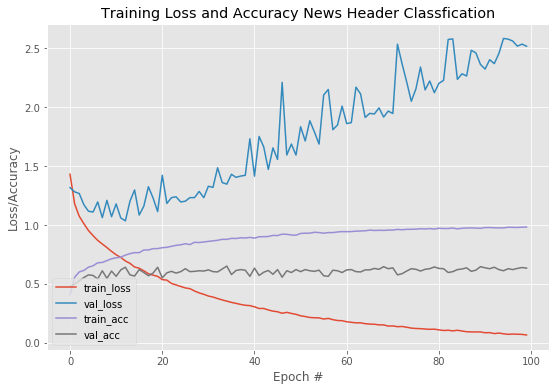

In [99]:
plt.style.use("ggplot")
plt.figure(figsize=(9, 6))
N = 100

plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")

plt.title("Training Loss and Accuracy News Header Classfication")
plt.xlabel('Epoch #')
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()